In [1]:
# https://www.w3cschool.cn/hyspo/hyspo-sufo3721.html
import numpy as np
import pandas as pd

## 数据结构

|维数|	名称|	描述|
|  ----  | ----  |---|
|1|	Series|	带标签的一维同构数组|
|2|	DataFrame|	带标签的，大小可变的，二维异构表格|

### 为什么有多个数据结构？
  Pandas 数据结构就像是低维数据的容器。比如，DataFrame 是 Series 的容器，Series 则是标量的容器。使用这种方式，可以在容器中以字典的形式插入或删除对象。  

  此外，通用 API 函数的默认操作要顾及时间序列与截面数据集的方向。多维数组存储二维或三维数据时，编写函数要注意数据集的方向，这对用户来说是一种负担；如果不考虑 C 或 Fortran 中连续性对性能的影响，一般情况下，不同的轴在程序里其实没有什么区别。Pandas 里，轴的概念主要是为了给数据赋予更直观的语义，即用“更恰当”的方式表示数据集的方向。这样做可以让用户编写数据转换函数时，少费点脑子。  
```python
for col in df.columns:
    series = df[col]
```
  处理 DataFrame 等表格数据时，index（行）或 columns（列）比 axis 0 和 axis 1 更直观。用这种方式迭代 DataFrame 的列，代码更易读易懂：

In [3]:
# 入门 https://www.w3cschool.cn/hyspo/hyspo-m7je3723.html
s = pd.Series([1, 3, 5, np.nan, 6, 7])  # 用值列表生成 Series 时，Pandas 默认自动生成整数索引
print(s)

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    7.0
dtype: float64


In [4]:
# 用含日期时间索引与标签的 NumPy 数组生成 DataFrame
dates = pd.date_range('20210509', periods=6)
print(dates)
df = pd.DataFrame(np.random.rand(6, 4), index=dates, columns=list('abcd'))
print(df)

DatetimeIndex(['2021-05-09', '2021-05-10', '2021-05-11', '2021-05-12',
               '2021-05-13', '2021-05-14'],
              dtype='datetime64[ns]', freq='D')
                   a         b         c         d
2021-05-09  0.194362  0.581930  0.016065  0.317141
2021-05-10  0.137828  0.106331  0.357647  0.816161
2021-05-11  0.487813  0.172038  0.475729  0.668828
2021-05-12  0.445469  0.031866  0.260916  0.060886
2021-05-13  0.422160  0.564189  0.206295  0.885352
2021-05-14  0.015215  0.625490  0.939655  0.553077


In [5]:
# 用 Series 字典对象生成 DataFrame
df2 = pd.DataFrame({'A': 1,
                   'B': pd.Timestamp('20210509'),
                   'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                   'D': np.array([3] * 4, dtype='int32'),
                   'E': pd.Categorical(['test', 'train', 'train', 'test']),
                   'F': 'foo'
                  })
print(df2)
print(df2.dtypes)   # 该 DataFrame 的列有不同数据类型。

   A          B    C  D      E    F
0  1 2021-05-09  1.0  3   test  foo
1  1 2021-05-09  1.0  3  train  foo
2  1 2021-05-09  1.0  3  train  foo
3  1 2021-05-09  1.0  3   test  foo
A             int64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object


# 查看数据

In [6]:
print('查看头部数据，未设置参数即为所有行：\n', df.head())   
print('查看前两行数据\n', df.head(2))
print('同理，查看尾部两行数据:\n', df.tail(2))

查看头部数据，未设置参数即为所有行：
                    a         b         c         d
2021-05-09  0.194362  0.581930  0.016065  0.317141
2021-05-10  0.137828  0.106331  0.357647  0.816161
2021-05-11  0.487813  0.172038  0.475729  0.668828
2021-05-12  0.445469  0.031866  0.260916  0.060886
2021-05-13  0.422160  0.564189  0.206295  0.885352
查看前两行数据
                    a         b         c         d
2021-05-09  0.194362  0.581930  0.016065  0.317141
2021-05-10  0.137828  0.106331  0.357647  0.816161
同理，查看尾部两行数据:
                    a         b         c         d
2021-05-13  0.422160  0.564189  0.206295  0.885352
2021-05-14  0.015215  0.625490  0.939655  0.553077


In [7]:
print(df.index)     # 显示索引
print(df.columns)   # 显示列名

DatetimeIndex(['2021-05-09', '2021-05-10', '2021-05-11', '2021-05-12',
               '2021-05-13', '2021-05-14'],
              dtype='datetime64[ns]', freq='D')
Index(['a', 'b', 'c', 'd'], dtype='object')


`DataFrame.to_numpy() `输出底层数据的 NumPy 对象。注意，DataFrame 的列由**多种数据类型**组成时，该操作**耗费系统资源较大**，这也是 Pandas 和 NumPy 的本质区别：**NumPy** 数组只有**一种数据类型**，**DataFrame** 每列的数据类型各**不相同**。调用 DataFrame.to_numpy() 时，Pandas 查找支持 DataFrame 里所有数据类型的 NumPy 数据类型。还有一种数据类型是 object，可以把 DataFrame 列里的值强制转换为 Python 对象。

In [8]:
# 下面的 df 这个 DataFrame 里的值都是浮点数，DataFrame.to_numpy() 的操作会很快，而且不复制数据。
print(df.to_numpy())
# df2 这个 DataFrame 包含了多种类型，DataFrame.to_numpy() 操作就会耗费较多资源。
print(df2.to_numpy())      # DataFrame.to_numpy() 的输出不包含行索引和列标签。

[[0.19436228 0.58192995 0.01606485 0.31714138]
 [0.13782843 0.10633127 0.35764749 0.81616134]
 [0.4878131  0.17203817 0.47572919 0.66882847]
 [0.44546899 0.03186614 0.26091611 0.06088618]
 [0.42216035 0.56418909 0.20629511 0.88535172]
 [0.01521515 0.62549028 0.93965475 0.55307672]]
[[1 Timestamp('2021-05-09 00:00:00') 1.0 3 'test' 'foo']
 [1 Timestamp('2021-05-09 00:00:00') 1.0 3 'train' 'foo']
 [1 Timestamp('2021-05-09 00:00:00') 1.0 3 'train' 'foo']
 [1 Timestamp('2021-05-09 00:00:00') 1.0 3 'test' 'foo']]


In [9]:
# describe() 可以快速查看数据的统计摘要
print(df)
df.describe()

                   a         b         c         d
2021-05-09  0.194362  0.581930  0.016065  0.317141
2021-05-10  0.137828  0.106331  0.357647  0.816161
2021-05-11  0.487813  0.172038  0.475729  0.668828
2021-05-12  0.445469  0.031866  0.260916  0.060886
2021-05-13  0.422160  0.564189  0.206295  0.885352
2021-05-14  0.015215  0.625490  0.939655  0.553077


,a,b,c,d
count,6.000000,6.000000,6.000000,6.000000
mean,0.283808,0.346974,0.376051,0.550241
std,0.194086,0.271206,0.316097,0.313333
min,0.015215,0.031866,0.016065,0.060886
25%,0.151962,0.122758,0.219950,0.376125
50%,0.308261,0.368114,0.309282,0.610953
75%,0.439642,0.577495,0.446209,0.779328
max,0.487813,0.625490,0.939655,0.885352


In [10]:
# 转置
df.T

,2021-05-09,2021-05-10,2021-05-11,2021-05-12,2021-05-13,2021-05-14
a,0.194362,0.137828,0.487813,0.445469,0.422160,0.015215
b,0.581930,0.106331,0.172038,0.031866,0.564189,0.625490
c,0.016065,0.357647,0.475729,0.260916,0.206295,0.939655
d,0.317141,0.816161,0.668828,0.060886,0.885352,0.553077


In [11]:
# 排序
# 按轴排序
print(df.sort_index(axis=1, ascending=False))     # 0 or 'index', 1 or 'columns'
print(df.sort_index(axis=0, ascending=False))

# 按值排序
print(df.sort_values(by='b'))

                   d         c         b         a
2021-05-09  0.317141  0.016065  0.581930  0.194362
2021-05-10  0.816161  0.357647  0.106331  0.137828
2021-05-11  0.668828  0.475729  0.172038  0.487813
2021-05-12  0.060886  0.260916  0.031866  0.445469
2021-05-13  0.885352  0.206295  0.564189  0.422160
2021-05-14  0.553077  0.939655  0.625490  0.015215
                   a         b         c         d
2021-05-14  0.015215  0.625490  0.939655  0.553077
2021-05-13  0.422160  0.564189  0.206295  0.885352
2021-05-12  0.445469  0.031866  0.260916  0.060886
2021-05-11  0.487813  0.172038  0.475729  0.668828
2021-05-10  0.137828  0.106331  0.357647  0.816161
2021-05-09  0.194362  0.581930  0.016065  0.317141
                   a         b         c         d
2021-05-12  0.445469  0.031866  0.260916  0.060886
2021-05-10  0.137828  0.106331  0.357647  0.816161
2021-05-11  0.487813  0.172038  0.475729  0.668828
2021-05-13  0.422160  0.564189  0.206295  0.885352
2021-05-09  0.194362  0.581930 

# 选择

In [12]:
print(df)

                   a         b         c         d
2021-05-09  0.194362  0.581930  0.016065  0.317141
2021-05-10  0.137828  0.106331  0.357647  0.816161
2021-05-11  0.487813  0.172038  0.475729  0.668828
2021-05-12  0.445469  0.031866  0.260916  0.060886
2021-05-13  0.422160  0.564189  0.206295  0.885352
2021-05-14  0.015215  0.625490  0.939655  0.553077


In [13]:
print(df['a'])   # 选择单列，产生 Series，与 df.a 等效

2021-05-09    0.194362
2021-05-10    0.137828
2021-05-11    0.487813
2021-05-12    0.445469
2021-05-13    0.422160
2021-05-14    0.015215
Freq: D, Name: a, dtype: float64


In [14]:
print(df[0:2])                        # []对 行 切片
print(df['20210509':'20210511'])

                   a         b         c         d
2021-05-09  0.194362  0.581930  0.016065  0.317141
2021-05-10  0.137828  0.106331  0.357647  0.816161
                   a         b         c         d
2021-05-09  0.194362  0.581930  0.016065  0.317141
2021-05-10  0.137828  0.106331  0.357647  0.816161
2021-05-11  0.487813  0.172038  0.475729  0.668828


## 按标签选择

In [15]:
dates = pd.date_range('20210509', periods=6)
print(dates)
print(dates[0])
print(df.loc[dates[0]])     # 用标签提取一行数据

DatetimeIndex(['2021-05-09', '2021-05-10', '2021-05-11', '2021-05-12',
               '2021-05-13', '2021-05-14'],
              dtype='datetime64[ns]', freq='D')
2021-05-09 00:00:00
a    0.194362
b    0.581930
c    0.016065
d    0.317141
Name: 2021-05-09 00:00:00, dtype: float64


In [16]:
print(df.loc[:, ['a', 'b']]) # 用标签选择多列数据

                   a         b
2021-05-09  0.194362  0.581930
2021-05-10  0.137828  0.106331
2021-05-11  0.487813  0.172038
2021-05-12  0.445469  0.031866
2021-05-13  0.422160  0.564189
2021-05-14  0.015215  0.625490


In [17]:
print(df.loc['20210512':, ['a', 'c', 'd']])  # 用标签切片，包含行与列结束点

                   a         c         d
2021-05-12  0.445469  0.260916  0.060886
2021-05-13  0.422160  0.206295  0.885352
2021-05-14  0.015215  0.939655  0.553077


In [18]:
print(df.loc['20210510', ['a', 'c']])   # 返回对象降维
print(df.loc['20210510', ['a']])        # 提取标量值
print(df.at[dates[1], 'a'])            # 快速访问标量，与上述方法等效

a    0.137828
c    0.357647
Name: 2021-05-10 00:00:00, dtype: float64
a    0.137828
Name: 2021-05-10 00:00:00, dtype: float64
0.13782843445546067


## 按位置选择

In [78]:
print(df)

                   a         b         c         d
2021-05-09  0.119961  0.468303  0.505817  0.872104
2021-05-10  0.919290  0.606701  0.702239  0.781662
2021-05-11  0.040472  0.760895  0.391770  0.142076
2021-05-12  0.356875  0.460742  0.046852  0.964362
2021-05-13  0.958817  0.951671  0.269740  0.972632
2021-05-14  0.295673  0.445668  0.665057  0.220061


In [79]:
print(df.iloc[3])   # 用整数位置选择

a    0.356875
b    0.460742
c    0.046852
d    0.964362
Name: 2021-05-12 00:00:00, dtype: float64


In [80]:
print(df.iloc[3:5, 0:2]) # 类似 NumPy / Python，用整数切片

                   a         b
2021-05-12  0.356875  0.460742
2021-05-13  0.958817  0.951671


In [82]:
print(df.iloc[[1, 2, 4], [0, 2]])  # 类似 NumPy / Python，用整数列表按位置切片

                   a         c
2021-05-10  0.919290  0.702239
2021-05-11  0.040472  0.391770
2021-05-13  0.958817  0.269740


In [86]:
print(df.iloc[1:3, :]) # 显式整行切片
print(df.iloc[1:3])

                   a         b         c         d
2021-05-10  0.919290  0.606701  0.702239  0.781662
2021-05-11  0.040472  0.760895  0.391770  0.142076
                   a         b         c         d
2021-05-10  0.919290  0.606701  0.702239  0.781662
2021-05-11  0.040472  0.760895  0.391770  0.142076


In [88]:
print(df.iloc[:, 1:3])  # 显式整列切片
print(df.iloc[0:, 1:3])

                   b         c
2021-05-09  0.468303  0.505817
2021-05-10  0.606701  0.702239
2021-05-11  0.760895  0.391770
2021-05-12  0.460742  0.046852
2021-05-13  0.951671  0.269740
2021-05-14  0.445668  0.665057
                   b         c
2021-05-09  0.468303  0.505817
2021-05-10  0.606701  0.702239
2021-05-11  0.760895  0.391770
2021-05-12  0.460742  0.046852
2021-05-13  0.951671  0.269740
2021-05-14  0.445668  0.665057


In [90]:
print(df.iloc[1, 1])   # 显式提取值
print(df.iat[1, 1])    # 快速访问标量，与上述方法等效

0.6067007607035125
0.6067007607035125


## 布尔索引

In [94]:
print(df.a > 0.5)
print(df[df.a > 0.5])  # 用单列的值选择数据

2021-05-09    False
2021-05-10     True
2021-05-11    False
2021-05-12    False
2021-05-13     True
2021-05-14    False
Freq: D, Name: a, dtype: bool
                   a         b         c         d
2021-05-10  0.919290  0.606701  0.702239  0.781662
2021-05-13  0.958817  0.951671  0.269740  0.972632


In [97]:
print(df > 0.5)
print(df[df > 0.5])  # 选择 DataFrame 里满足条件的值

                a      b      c      d
2021-05-09  False  False   True   True
2021-05-10   True   True   True   True
2021-05-11  False   True  False  False
2021-05-12  False  False  False   True
2021-05-13   True   True  False   True
2021-05-14  False  False   True  False
                   a         b         c         d
2021-05-09       NaN       NaN  0.505817  0.872104
2021-05-10  0.919290  0.606701  0.702239  0.781662
2021-05-11       NaN  0.760895       NaN       NaN
2021-05-12       NaN       NaN       NaN  0.964362
2021-05-13  0.958817  0.951671       NaN  0.972632
2021-05-14       NaN       NaN  0.665057       NaN


In [102]:
df2 = df.copy()
print(df2)
df2['e'] = ['one', 'one', 'two', 'three', 'four', 'three']
print(df2)
print(df2[df2['e'].isin(['two', 'four'])])

                   a         b         c         d
2021-05-09  0.119961  0.468303  0.505817  0.872104
2021-05-10  0.919290  0.606701  0.702239  0.781662
2021-05-11  0.040472  0.760895  0.391770  0.142076
2021-05-12  0.356875  0.460742  0.046852  0.964362
2021-05-13  0.958817  0.951671  0.269740  0.972632
2021-05-14  0.295673  0.445668  0.665057  0.220061
                   a         b         c         d      e
2021-05-09  0.119961  0.468303  0.505817  0.872104    one
2021-05-10  0.919290  0.606701  0.702239  0.781662    one
2021-05-11  0.040472  0.760895  0.391770  0.142076    two
2021-05-12  0.356875  0.460742  0.046852  0.964362  three
2021-05-13  0.958817  0.951671  0.269740  0.972632   four
2021-05-14  0.295673  0.445668  0.665057  0.220061  three
                   a         b        c         d     e
2021-05-11  0.040472  0.760895  0.39177  0.142076   two
2021-05-13  0.958817  0.951671  0.26974  0.972632  four


# 赋值

In [108]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index = pd.date_range('20210512', periods=6))
print(s1)

2021-05-12    1
2021-05-13    2
2021-05-14    3
2021-05-15    4
2021-05-16    5
2021-05-17    6
Freq: D, dtype: int64


In [109]:
df2['f'] = s1   # 用索引自动对齐新增列的数据
print(df2)

                   a         b         c         d      e    f
2021-05-09  0.119961  0.468303  0.505817  0.872104    one  NaN
2021-05-10  0.919290  0.606701  0.702239  0.781662    one  NaN
2021-05-11  0.040472  0.760895  0.391770  0.142076    two  NaN
2021-05-12  0.356875  0.460742  0.046852  0.964362  three  1.0
2021-05-13  0.958817  0.951671  0.269740  0.972632   four  2.0
2021-05-14  0.295673  0.445668  0.665057  0.220061  three  3.0


In [111]:
print(dates[0])
df2.at[dates[0], 'a'] = 0 # 按标签赋值
print(df2)

2021-05-09 00:00:00
                   a         b         c         d      e    f
2021-05-09  0.000000  0.468303  0.505817  0.872104    one  NaN
2021-05-10  0.919290  0.606701  0.702239  0.781662    one  NaN
2021-05-11  0.040472  0.760895  0.391770  0.142076    two  NaN
2021-05-12  0.356875  0.460742  0.046852  0.964362  three  1.0
2021-05-13  0.958817  0.951671  0.269740  0.972632   four  2.0
2021-05-14  0.295673  0.445668  0.665057  0.220061  three  3.0


In [114]:
df2.iat[0, 1] = 0  # 按位置赋值
print(df2)

                   a         b         c         d      e    f
2021-05-09  0.000000  0.000000  0.505817  0.872104    one  NaN
2021-05-10  0.919290  0.606701  0.702239  0.781662    one  NaN
2021-05-11  0.040472  0.760895  0.391770  0.142076    two  NaN
2021-05-12  0.356875  0.460742  0.046852  0.964362  three  1.0
2021-05-13  0.958817  0.951671  0.269740  0.972632   four  2.0
2021-05-14  0.295673  0.445668  0.665057  0.220061  three  3.0


In [115]:
df2.loc[:, 'd'] = np.array([5] * len(df2))
print(df2)

                   a         b         c  d      e    f
2021-05-09  0.000000  0.000000  0.505817  5    one  NaN
2021-05-10  0.919290  0.606701  0.702239  5    one  NaN
2021-05-11  0.040472  0.760895  0.391770  5    two  NaN
2021-05-12  0.356875  0.460742  0.046852  5  three  1.0
2021-05-13  0.958817  0.951671  0.269740  5   four  2.0
2021-05-14  0.295673  0.445668  0.665057  5  three  3.0


In [121]:
df3 = df.copy()
print(df3)
df3[df3 > 0] = -df3  # 用 where 条件赋值
print(df3)

                   a         b         c         d
2021-05-09  0.119961  0.468303  0.505817  0.872104
2021-05-10  0.919290  0.606701  0.702239  0.781662
2021-05-11  0.040472  0.760895  0.391770  0.142076
2021-05-12  0.356875  0.460742  0.046852  0.964362
2021-05-13  0.958817  0.951671  0.269740  0.972632
2021-05-14  0.295673  0.445668  0.665057  0.220061
                   a         b         c         d
2021-05-09 -0.119961 -0.468303 -0.505817 -0.872104
2021-05-10 -0.919290 -0.606701 -0.702239 -0.781662
2021-05-11 -0.040472 -0.760895 -0.391770 -0.142076
2021-05-12 -0.356875 -0.460742 -0.046852 -0.964362
2021-05-13 -0.958817 -0.951671 -0.269740 -0.972632
2021-05-14 -0.295673 -0.445668 -0.665057 -0.220061


# 缺失值
Pandas 主要用 np.nan 表示缺失数据。 计算时，默认不包含空值。详见缺失数据。

重建索引（reindex）可以更改、添加、删除指定轴的索引，并返回数据副本，即**不更改原数据**。

In [20]:
print(df)

                   a         b         c         d
2021-05-09  0.194362  0.581930  0.016065  0.317141
2021-05-10  0.137828  0.106331  0.357647  0.816161
2021-05-11  0.487813  0.172038  0.475729  0.668828
2021-05-12  0.445469  0.031866  0.260916  0.060886
2021-05-13  0.422160  0.564189  0.206295  0.885352
2021-05-14  0.015215  0.625490  0.939655  0.553077


In [25]:
df1 = df.reindex(index = dates[0:4], columns = list(df.columns) + ['e'])
print(df1)

df1.loc[dates[0]:dates[1], 'e'] = 1
print(df1)

                   a         b         c         d   e
2021-05-09  0.194362  0.581930  0.016065  0.317141 NaN
2021-05-10  0.137828  0.106331  0.357647  0.816161 NaN
2021-05-11  0.487813  0.172038  0.475729  0.668828 NaN
2021-05-12  0.445469  0.031866  0.260916  0.060886 NaN
                   a         b         c         d    e
2021-05-09  0.194362  0.581930  0.016065  0.317141  1.0
2021-05-10  0.137828  0.106331  0.357647  0.816161  1.0
2021-05-11  0.487813  0.172038  0.475729  0.668828  NaN
2021-05-12  0.445469  0.031866  0.260916  0.060886  NaN


In [30]:
df1.dropna(how = 'any')       # 不会改变原dataframe

,a,b,c,d,e
2021-05-09,0.194362,0.581930,0.016065,0.317141,1.0
2021-05-10,0.137828,0.106331,0.357647,0.816161,1.0


In [33]:
df1.fillna(value=5)         # 不会改变原dataframe

,a,b,c,d,e
2021-05-09,0.194362,0.581930,0.016065,0.317141,1.0
2021-05-10,0.137828,0.106331,0.357647,0.816161,1.0
2021-05-11,0.487813,0.172038,0.475729,0.668828,5.0
2021-05-12,0.445469,0.031866,0.260916,0.060886,5.0


In [34]:
pd.isna(df1)      # 提取 nan 值的布尔掩码

,a,b,c,d,e
2021-05-09,False,False,False,False,False
2021-05-10,False,False,False,False,False
2021-05-11,False,False,False,False,True
2021-05-12,False,False,False,False,True


# 运算

In [38]:
print(df)

                   a         b         c         d
2021-05-09  0.194362  0.581930  0.016065  0.317141
2021-05-10  0.137828  0.106331  0.357647  0.816161
2021-05-11  0.487813  0.172038  0.475729  0.668828
2021-05-12  0.445469  0.031866  0.260916  0.060886
2021-05-13  0.422160  0.564189  0.206295  0.885352
2021-05-14  0.015215  0.625490  0.939655  0.553077


## 统计

In [39]:
df.describe()

,a,b,c,d
count,6.000000,6.000000,6.000000,6.000000
mean,0.283808,0.346974,0.376051,0.550241
std,0.194086,0.271206,0.316097,0.313333
min,0.015215,0.031866,0.016065,0.060886
25%,0.151962,0.122758,0.219950,0.376125
50%,0.308261,0.368114,0.309282,0.610953
75%,0.439642,0.577495,0.446209,0.779328
max,0.487813,0.625490,0.939655,0.885352


In [40]:
df.mean()

a    0.283808
b    0.346974
c    0.376051
d    0.550241
dtype: float64

In [41]:
df.mean(axis=1)     # 在另一个轴(即，行)上执行同样的操作

2021-05-09    0.277375
2021-05-10    0.354492
2021-05-11    0.451102
2021-05-12    0.199784
2021-05-13    0.519499
2021-05-14    0.533359
Freq: D, dtype: float64

In [46]:
s = pd.Series([1, 3, 0.4, np.nan, 6, 7], index=dates).shift(2)
print(s)

df.sub(s, axis='index') # 不同维度对象运算时，要先对齐。 此外，Pandas 自动沿指定维度广播

2021-05-09    NaN
2021-05-10    NaN
2021-05-11    1.0
2021-05-12    3.0
2021-05-13    0.4
2021-05-14    NaN
Freq: D, dtype: float64


,a,b,c,d
2021-05-09,NaN,NaN,NaN,NaN
2021-05-10,NaN,NaN,NaN,NaN
2021-05-11,-0.512187,-0.827962,-0.524271,-0.331172
2021-05-12,-2.554531,-2.968134,-2.739084,-2.939114
2021-05-13,0.022160,0.164189,-0.193705,0.485352
2021-05-14,NaN,NaN,NaN,NaN


## Apply 函数

In [48]:
print(df)
df.apply(np.cumsum)  # np.cumsum是累加函数

                   a         b         c         d
2021-05-09  0.194362  0.581930  0.016065  0.317141
2021-05-10  0.137828  0.106331  0.357647  0.816161
2021-05-11  0.487813  0.172038  0.475729  0.668828
2021-05-12  0.445469  0.031866  0.260916  0.060886
2021-05-13  0.422160  0.564189  0.206295  0.885352
2021-05-14  0.015215  0.625490  0.939655  0.553077


,a,b,c,d
2021-05-09,0.194362,0.581930,0.016065,0.317141
2021-05-10,0.332191,0.688261,0.373712,1.133303
2021-05-11,0.820004,0.860299,0.849442,1.802131
2021-05-12,1.265473,0.892166,1.110358,1.863017
2021-05-13,1.687633,1.456355,1.316653,2.748369
2021-05-14,1.702848,2.081845,2.256307,3.301446


In [49]:
df.apply(lambda x: x.max() - x.min())

a    0.472598
b    0.593624
c    0.923590
d    0.824466
dtype: float64

# 直方图

In [53]:
s = pd.Series(np.random.randint(0, 7, size=10)) # [0, 7)是范围
print(s)

print(s.value_counts()) # 统计数量

0    5
1    3
2    1
3    1
4    4
5    4
6    4
7    6
8    5
9    2
dtype: int32
4    3
5    2
1    2
6    1
3    1
2    1
dtype: int64


# 字符串
Series 的 str 属性包含一组字符串处理功能，如下列代码所示。注意，str 的模式匹配默认使用正则表达式。详见矢量字符串方法

In [58]:
s = pd.Series(['A', 'B', 'C', 'ZGq', np.nan, 'CNN', 'lstm'])
print(s.str.lower())

0       a
1       b
2       c
3     zgq
4     NaN
5     cnn
6    lstm
dtype: object


# 合并Merge

## 结合Concat

In [61]:
df = pd.DataFrame(np.random.randint(0, 100, 40).reshape(10, 4))
print(df)

    0   1   2   3
0  20  58  91  82
1  27  49   5  10
2  20  65  77  89
3  28  20   3  31
4  72  57  51  33
5   4  20  73  16
6  57   5  30   8
7  56  13  39   2
8  81  70  63  24
9  36  29  97  14


In [62]:
pieces = [df[:3], df[3:7], df[7:]] # 分解为多组

In [63]:
pd.concat(pieces)

,0,1,2,3
0,20,58,91,82
1,27,49,5,10
2,20,65,77,89
3,28,20,3,31
4,72,57,51,33
5,4,20,73,16
6,57,5,30,8
7,56,13,39,2
8,81,70,63,24
9,36,29,97,14


## 连接join

In [66]:
left = pd.DataFrame({'key':['foo', 'foo'], 'left_val':[1, 2]})
print(left)
right = pd.DataFrame({'key':['foo', 'foo'], 'right_val':[4, 5]})
print(right)
print(pd.merge(left, right, on='key'))

   key  left_val
0  foo         1
1  foo         2
   key  right_val
0  foo          4
1  foo          5
   key  left_val  right_val
0  foo         1          4
1  foo         1          5
2  foo         2          4
3  foo         2          5


In [67]:
left = pd.DataFrame({'key':['foo', 'bar'], 'left_val':[1, 2]})
print(left)
right = pd.DataFrame({'key':['foo', 'bar'], 'right_val':[4, 5]})
print(right)
print(pd.merge(left, right, on='key'))

   key  left_val
0  foo         1
1  bar         2
   key  right_val
0  foo          4
1  bar          5
   key  left_val  right_val
0  foo         1          4
1  bar         2          5


# 追加Append

In [72]:
df = pd.DataFrame(np.random.rand(8, 4) ,columns=['a', 'b', 'c', 'd'])
print(df)

s = df.iloc[3]
print(s)

print(df.append(s, ignore_index=True))

          a         b         c         d
0  0.643818  0.130053  0.476042  0.908364
1  0.861220  0.303608  0.999696  0.374316
2  0.349383  0.534909  0.901204  0.931647
3  0.068667  0.304687  0.376849  0.068108
4  0.916497  0.992258  0.486073  0.713529
5  0.582673  0.500118  0.726882  0.330812
6  0.494898  0.597207  0.989006  0.907708
7  0.436702  0.506010  0.361808  0.952283
a    0.068667
b    0.304687
c    0.376849
d    0.068108
Name: 3, dtype: float64
          a         b         c         d
0  0.643818  0.130053  0.476042  0.908364
1  0.861220  0.303608  0.999696  0.374316
2  0.349383  0.534909  0.901204  0.931647
3  0.068667  0.304687  0.376849  0.068108
4  0.916497  0.992258  0.486073  0.713529
5  0.582673  0.500118  0.726882  0.330812
6  0.494898  0.597207  0.989006  0.907708
7  0.436702  0.506010  0.361808  0.952283
8  0.068667  0.304687  0.376849  0.068108


# 分组Grouping
`group by`指的是涵盖下列一项或多项步骤的处理流程：
- 分割：按条件把数据分割成多组；
- 应用：为每组单独应用函数；
- 组合：将处理结果组合成一个数据结构。

In [83]:
df = pd.DataFrame({
    'A':['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'bar'],
    'B':['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
    'C':np.random.randint(1, 8, 8),
    'D':np.random.randint(1, 8, 8)
})
print(df)

     A      B  C  D
0  foo    one  4  2
1  bar    one  5  2
2  foo    two  4  3
3  bar  three  3  3
4  foo    two  2  4
5  bar    two  6  7
6  foo    one  2  1
7  bar  three  3  7


In [84]:
print(df.groupby('A').sum())

      C   D
A          
bar  17  19
foo  12  10


In [88]:
print(df.groupby(['A', 'B']).sum())

           C   D
A   B           
bar one    5   2
    three  6  10
    two    6   7
foo one    6   3
    two    6   7


# 重塑Reshaping

## 堆叠Stack

In [90]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]))
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [92]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])  # 将元组列表转换为MultiIndex
print(index)

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])


In [98]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
print(df)

                     A         B
first second                    
bar   one     1.742093  0.256200
      two     1.329547 -0.732145
baz   one     0.035586  0.316208
      two     0.000559  0.357578
foo   one    -0.590380 -1.764003
      two     0.409041 -0.255502
qux   one     0.606041 -0.013279
      two     0.222806  0.767227


In [105]:
stacked = df.stack()  # stack()方法把 DataFrame 列压缩至一层
stacked

first  second   
bar    one     A    1.742093
               B    0.256200
       two     A    1.329547
               B   -0.732145
baz    one     A    0.035586
               B    0.316208
       two     A    0.000559
               B    0.357578
foo    one     A   -0.590380
               B   -1.764003
       two     A    0.409041
               B   -0.255502
qux    one     A    0.606041
               B   -0.013279
       two     A    0.222806
               B    0.767227
dtype: float64

In [106]:
stacked.unstack()  # 压缩后的 DataFrame 或 Series 具有多层索引， stack() 的逆操作是 unstack()，默认为拆叠最后一层

A         B
first second                    
bar   one     1.742093  0.256200
      two     1.329547 -0.732145
baz   one     0.035586  0.316208
      two     0.000559  0.357578
foo   one    -0.590380 -1.764003
      two     0.409041 -0.255502
qux   one     0.606041 -0.013279
      two     0.222806  0.767227

# 数据透视图Pivot Tables

In [122]:
df = pd.DataFrame({
    'A': ['one', 'one', 'two', 'three'] * 3,
    'B': ['A', 'B', 'C'] * 4,
    'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
    'D': np.random.randint(1, 5, 12),
    'e': np.random.randint(1, 5, 12)
})
print(df)

        A  B    C  D  e
0     one  A  foo  4  2
1     one  B  foo  4  2
2     two  C  foo  3  2
3   three  A  bar  3  4
4     one  B  bar  2  3
5     one  C  bar  4  4
6     two  A  foo  4  2
7   three  B  foo  3  1
8     one  C  foo  2  4
9     one  A  bar  2  2
10    two  B  bar  2  1
11  three  C  bar  3  1


In [123]:
pd.pivot_table(df, values='e', index=['A', 'B'], columns=['C'])

C        bar  foo
A     B          
one   A  2.0  2.0
      B  3.0  2.0
      C  4.0  4.0
three A  4.0  NaN
      B  NaN  1.0
      C  1.0  NaN
two   A  NaN  2.0
      B  1.0  NaN
      C  NaN  2.0

# 时间序列TimeSeries
Pandas 为频率转换时重采样提供了虽然简单易用，但强大高效的功能，如，将秒级的数据转换为 5 分钟为频率的数据。这种操作常见于财务应用程序，但又不仅限于此。详见时间序列

In [132]:
rng = pd.date_range('05/14/2021', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
print(ts)

2021-05-14 00:00:00    228
2021-05-14 00:00:01    295
2021-05-14 00:00:02    460
2021-05-14 00:00:03    261
2021-05-14 00:00:04    171
                      ... 
2021-05-14 00:01:35     60
2021-05-14 00:01:36    367
2021-05-14 00:01:37    396
2021-05-14 00:01:38    491
2021-05-14 00:01:39      1
Freq: S, Length: 100, dtype: int32


In [139]:
print(ts.resample('5Min').sum())

2021-05-14    25852
Freq: 5T, dtype: int32


In [142]:
ts_utc = ts.tz_localize('UTC')  # 时区表示
ts_utc

2021-05-14 00:00:00+00:00    228
2021-05-14 00:00:01+00:00    295
2021-05-14 00:00:02+00:00    460
2021-05-14 00:00:03+00:00    261
2021-05-14 00:00:04+00:00    171
                            ... 
2021-05-14 00:01:35+00:00     60
2021-05-14 00:01:36+00:00    367
2021-05-14 00:01:37+00:00    396
2021-05-14 00:01:38+00:00    491
2021-05-14 00:01:39+00:00      1
Freq: S, Length: 100, dtype: int32

In [143]:
ts_utc.tz_convert('US/Eastern')

2021-05-13 20:00:00-04:00    228
2021-05-13 20:00:01-04:00    295
2021-05-13 20:00:02-04:00    460
2021-05-13 20:00:03-04:00    261
2021-05-13 20:00:04-04:00    171
                            ... 
2021-05-13 20:01:35-04:00     60
2021-05-13 20:01:36-04:00    367
2021-05-13 20:01:37-04:00    396
2021-05-13 20:01:38-04:00    491
2021-05-13 20:01:39-04:00      1
Freq: S, Length: 100, dtype: int32

In [148]:
# 转换时间段
rng = pd.date_range('1/1/2021', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
print(ts)

ps = ts.to_period()
print(ps)

ps.to_timestamp()

2021-01-31   -0.618780
2021-02-28    0.813643
2021-03-31   -0.240078
2021-04-30    0.738790
2021-05-31   -0.769049
Freq: M, dtype: float64
2021-01   -0.618780
2021-02    0.813643
2021-03   -0.240078
2021-04    0.738790
2021-05   -0.769049
Freq: M, dtype: float64


2021-01-01   -0.618780
2021-02-01    0.813643
2021-03-01   -0.240078
2021-04-01    0.738790
2021-05-01   -0.769049
Freq: MS, dtype: float64

In [154]:
prng = pd.period_range('2010Q1', '2020Q4', freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts.head()

2010-03-01 09:00   -0.834009
2010-06-01 09:00   -0.760466
2010-09-01 09:00    0.091813
2010-12-01 09:00    0.310896
2011-03-01 09:00    0.106975
Freq: H, dtype: float64

# 类别型Categoricals

In [156]:
df = pd.DataFrame({"id": [1, 2, 3, 4, 5, 6],
                   "raw_grade": ['a', 'b', 'b', 'a', 'a', 'e']})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [158]:
df["grade"] = df["raw_grade"].astype("category")
print(df["grade"])
print(df)

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']
   id raw_grade grade
0   1         a     a
1   2         b     b
2   3         b     b
3   4         a     a
4   5         a     a
5   6         e     e


In [159]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

In [160]:
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


 # 可视化

<AxesSubplot:>

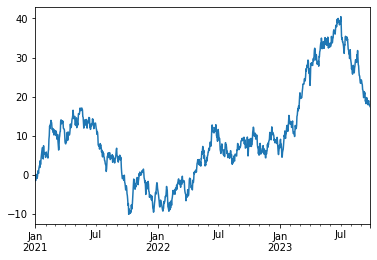

In [170]:
import matplotlib.pyplot as plt
%matplotlib inline
ts = pd.Series(np.random.randn(1000),index=pd.date_range('1/1/2021', periods=1000))
ts = ts.cumsum()
ts.plot()

<Figure size 432x288 with 0 Axes>

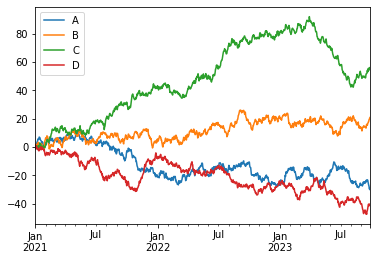

In [175]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                   columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure()
df.plot()
plt.legend(loc='best')

# CSV

In [176]:
df.to_csv('foo.csv')

In [177]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2021-01-01,-1.248345,0.192553,0.442364,0.444710
1,2021-01-02,1.116153,0.121536,0.964706,0.729129
2,2021-01-03,1.196305,1.984165,0.631357,1.086882
3,2021-01-04,1.306433,1.898015,0.734573,-0.722688
4,2021-01-05,1.729657,1.644555,0.331919,-1.255173
...,...,...,...,...,...
995,2023-09-23,-26.899202,17.800042,54.017799,-40.304920
996,2023-09-24,-27.672108,19.204610,55.248899,-41.590583
997,2023-09-25,-29.600809,19.371874,55.878157,-40.921985
998,2023-09-26,-29.299964,20.435790,54.732901,-41.182189


# HDF5

In [179]:
df.to_hdf('foo.h5', 'df')

In [180]:
pd.read_hdf('foo.h5', 'df')

,A,B,C,D
2021-01-01,-1.248345,0.192553,0.442364,0.444710
2021-01-02,1.116153,0.121536,0.964706,0.729129
2021-01-03,1.196305,1.984165,0.631357,1.086882
2021-01-04,1.306433,1.898015,0.734573,-0.722688
2021-01-05,1.729657,1.644555,0.331919,-1.255173
...,...,...,...,...
2023-09-23,-26.899202,17.800042,54.017799,-40.304920
2023-09-24,-27.672108,19.204610,55.248899,-41.590583
2023-09-25,-29.600809,19.371874,55.878157,-40.921985
2023-09-26,-29.299964,20.435790,54.732901,-41.182189


# EXCEL

In [191]:
df.to_excel('foo1.xlsx', sheet_name='Sheet1')

In [193]:
pd.read_excel('foo1.xlsx', 'Sheet1', index_col=None, na_values=['NA'], engine='openpyxl')

,Unnamed: 0,A,B,C,D
0,2021-01-01,-1.248345,0.192553,0.442364,0.444710
1,2021-01-02,1.116153,0.121536,0.964706,0.729129
2,2021-01-03,1.196305,1.984165,0.631357,1.086882
3,2021-01-04,1.306433,1.898015,0.734573,-0.722688
4,2021-01-05,1.729657,1.644555,0.331919,-1.255173
...,...,...,...,...,...
995,2023-09-23,-26.899202,17.800042,54.017799,-40.304920
996,2023-09-24,-27.672108,19.204610,55.248899,-41.590583
997,2023-09-25,-29.600809,19.371874,55.878157,-40.921985
998,2023-09-26,-29.299964,20.435790,54.732901,-41.182189


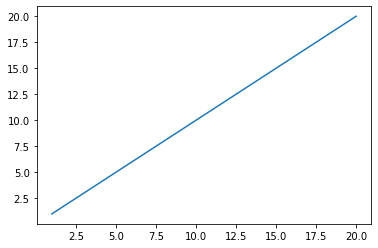

In [194]:
plt.plot([1, 20], [1, 20])